# Lab 1 Analysis Example using Thicket

In [24]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

What are the files we are analyzing?

In [25]:
all_files = glob("*.cali")
print(all_files)

['p2-a65536-s4.cali', 'p512-a65536-s4.cali', 'p2-a262144-s4.cali', 'p128-a1048576-s4.cali', 'p256-a1048576-s4.cali', 'p32-a262144-s4.cali', 'p16-a262144-s4.cali', 'p16-a1048576-s4.cali', 'p4-a262144-s4.cali', 'p2-a1048576-s4.cali', 'p32-a1048576-s4.cali', 'p32-a65536-s4.cali', 'p128-a262144-s4.cali', 'p16-a65536-s4.cali', 'p4-a1048576-s4.cali', 'p128-a65536-s4.cali']


# Read n files (n = 33)

In [26]:
tk = th.Thicket.from_caliperreader(all_files)

What files?

In [27]:
tk.profile_mapping

OrderedDict([(71961144, 'p512-a65536-s4.cali'),
             (276024093, 'p256-a1048576-s4.cali'),
             (987892162, 'p32-a262144-s4.cali'),
             (1478481897, 'p128-a1048576-s4.cali'),
             (1550687612, 'p4-a1048576-s4.cali'),
             (1713057658, 'p2-a262144-s4.cali'),
             (2394060121, 'p2-a65536-s4.cali'),
             (2435239214, 'p16-a1048576-s4.cali'),
             (2489538602, 'p32-a65536-s4.cali'),
             (2595917853, 'p4-a262144-s4.cali'),
             (2834840184, 'p32-a1048576-s4.cali'),
             (2956483147, 'p16-a262144-s4.cali'),
             (3202830469, 'p128-a65536-s4.cali'),
             (3572814818, 'p16-a65536-s4.cali'),
             (4246159856, 'p2-a1048576-s4.cali'),
             (4274460108, 'p128-a262144-s4.cali')])

Call tree

In [28]:
tk.statsframe.dataframe["test"] = -1
print(tk.tree(metric_column="test"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.3.1

-1.000 main
├─ -1.000 comm_large
├─ -1.000 comm_small
├─ -1.000 comp
│  ├─ -1.000 comp_large
│  └─ -1.000 comp_small
├─ -1.000 correctness_check
└─ -1.000 data_init

Legend (Metric: test Min: -1.00 Max: -1.00)
█ -1.00 - -1.00
█ -1.00 - -1.00
█ -1.00 - -1.00
█ -1.00 - -1.00
█ -1.00 - -1.00
█ -1.00 - -1.00

name User code    ◀  Only in left graph    ▶  Only in right graph



Performance data

In [29]:
tk.dataframe

nid  \
node                                              profile            
{'name': 'main', 'type': 'function'}              71961144       1   
                                                  276024093      1   
                                                  987892162      1   
                                                  1478481897     1   
                                                  1550687612     1   
                                                  1713057658     1   
                                                  2394060121     1   
                                                  2435239214     1   
                                                  2489538602     1   
                                                  2595917853     1   
                                                  2834840184     1   
                                                  2956483147     1   
                                                  3202830469     1   
                                                  3572814818     1   
                                                  4246159856     1   
                                                  4274460108     1   
{'name': 'comm_large', 'type': 'function'}        71961144       5   
                                                  276024093      5   
                                                  987892162      5   
                                                  1478481897     5   
                                                  1550687612     5   
                                                  1713057658     5   
                                                  2394060121     5   
                                                  2435239214     5   
                                                  2489538602     5   
                                                  2595917853     5   
                                                  2834840184     5   
                                                  2956483147     5   
                                                  3202830469     5   
                                                  3572814818     5   
                                                  4246159856     5   
                                                  4274460108     5   
{'name': 'comm_small', 'type': 'function'}        71961144       7   
                                                  276024093   <NA>   
                                                  987892162   <NA>   
                                                  1478481897  <NA>   
                                                  1550687612  <NA>   
                                                  1713057658  <NA>   
                                                  2394060121  <NA>   
                                                  2435239214  <NA>   
                                                  2489538602  <NA>   
                                                  2595917853  <NA>   
                                                  2834840184  <NA>   
                                                  2956483147  <NA>   
                                                  3202830469  <NA>   
                                                  3572814818  <NA>   
                                                  4246159856  <NA>   
                                                  4274460108  <NA>   
{'name': 'comp', 'type': 'function'}              71961144       3   
                                                  276024093      3   
                                                  987892162      3   
                                                  1478481897     3   
                                                  1550687612     3   
                                                  1713057658     3   
                                                  2394060121     3   
                                                  2435239214     3   
   

In [30]:
tk.dataframe = tk.dataframe.drop(["nid", "spot.channel", "Min time/rank", "Max time/rank", "Total time", "Variance time/rank"], axis=1)

In [31]:
tk.dataframe

Avg time/rank  \
node                                              profile                     
{'name': 'main', 'type': 'function'}              71961144       103.141123   
                                                  276024093       55.318936   
                                                  987892162        8.747850   
                                                  1478481897      33.749841   
                                                  1550687612     379.341811   
                                                  1713057658      47.821826   
                                                  2394060121       3.397833   
                                                  2435239214      99.015991   
                                                  2489538602       5.835642   
                                                  2595917853      24.536597   
                                                  2834840184      55.066745   
                                                  2956483147       9.470858   
                                                  3202830469      19.709157   
                                                  3572814818       3.357454   
                                                  4246159856     759.418752   
                                                  4274460108      27.015583   
{'name': 'comm_large', 'type': 'function'}        71961144         0.639823   
                                                  276024093        0.460566   
                                                  987892162        0.107227   
                                                  1478481897       0.200389   
                                                  1550687612       0.071324   
                                                  1713057658       0.020157   
                                                  2394060121       0.003938   
                                                  2435239214       0.092590   
                                                  2489538602       0.125680   
                                                  2595917853       0.022879   
                                                  2834840184       0.099863   
                                                  2956483147       0.066752   
                                                  3202830469       0.180371   
                                                  3572814818       0.064699   
                                                  4246159856       0.984355   
                                                  4274460108       0.155778   
{'name': 'comm_small', 'type': 'function'}        71961144         0.421708   
                                                  276024093             NaN   
                                                  987892162             NaN   
                                                  1478481897            NaN   
                                                  1550687612            NaN   
                                                  1713057658            NaN   
                                                  2394060121            NaN   
                                                  2435239214            NaN   
                                                  2489538602            NaN   
                                                  2595917853            NaN   
                                                  2834840184            NaN   
                                                  2956483147            NaN   
                                                  3202830469            NaN   
                                                  3572814818            NaN   
                                                  4246159856            NaN   
                                                  4274460108            NaN   
{'name': 'comp', 'type': 'function'}              71961144         0.058338   
                                 

Metadata

In [32]:
tk.metadata

,cali.caliper.version,mpi.world.size,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:node.order,spot:output,spot:time.variance,launchdate,libraries,cmdline,cluster,Algorithm,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,InputType,num_procs,num_threads,num_blocks,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,,,,,
71961144,2.11.0-dev,512,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p512-a65536-s4.cali,true,1701916581,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic_sort_MPI, 65536, 4]",c,BitonicSort,MPI,float,4,65536,Random,512,0,0,20,Online
276024093,2.11.0-dev,256,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p256-a1048576-s4.cali,true,1701978364,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic_sort_MPI, 1048576, 4]",c,BitonicSort,MPI,float,4,1048576,Random,256,0,0,20,Online
987892162,2.11.0-dev,32,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p32-a262144-s4.cali,true,1701982082,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic_sort_MPI, 262144, 4]",c,BitonicSort,MPI,float,4,262144,Random,32,0,0,20,Online
1478481897,2.11.0-dev,128,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p128-a1048576-s4.cali,true,1701978311,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic_sort_MPI, 1048576, 4]",c,BitonicSort,MPI,float,4,1048576,Random,128,0,0,20,Online
1550687612,2.11.0-dev,4,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p4-a1048576-s4.cali,true,1701978148,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic_sort_MPI, 1048576, 4]",c,BitonicSort,MPI,float,4,1048576,Random,4,0,0,20,Online
1713057658,2.11.0-dev,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p2-a262144-s4.cali,true,1701981978,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic_sort_MPI, 262144, 4]",c,BitonicSort,MPI,float,4,262144,Random,2,0,0,20,Online
2394060121,2.11.0-dev,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p2-a65536-s4.cali,true,1701977543,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic_sort_MPI, 65536, 4]",c,BitonicSort,MPI,float,4,65536,Random,2,0,0,20,Online
2435239214,2.11.0-dev,16,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p16-a1048576-s4.cali,true,1701978206,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic_sort_MPI, 1048576, 4]",c,BitonicSort,MPI,float,4,1048576,Random,16,0,0,20,Online
2489538602,2.11.0-dev,32,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p32-a65536-s4.cali,true,1701977784,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic_sort_MPI, 65536, 4]",c,BitonicSort,MPI,float,4,65536,Random,32,0,0,20,Online


# Goal

programmatically analyze the data by graphing it

Groupby matrix size argument, available in the metadata (tk.metadata) to organize our performance data into 3 groupings.

In [33]:
gb = tk.groupby(["num_procs", "InputType"])

7  thickets created...
{(2, 'Random'): <thicket.thicket.Thicket object at 0x7fe028fe6850>, (4, 'Random'): <thicket.thicket.Thicket object at 0x7fe01a2dbf70>, (16, 'Random'): <thicket.thicket.Thicket object at 0x7fe028f9a9d0>, (32, 'Random'): <thicket.thicket.Thicket object at 0x7fe028f952e0>, (128, 'Random'): <thicket.thicket.Thicket object at 0x7fe01a2695e0>, (256, 'Random'): <thicket.thicket.Thicket object at 0x7fe029143bb0>, (512, 'Random'): <thicket.thicket.Thicket object at 0x7fe01a269070>}


Compose these 3 groups column-wise to get a holistic view of the data

In [34]:
ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="InputSize"
)

In [35]:
ctk.dataframe

(2, Random)  \
                                                            Avg time/rank   
node                                              InputSize                 
{'name': 'main', 'type': 'function'}              65536          3.397833   
                                                  262144        47.821826   
                                                  1048576      759.418752   
{'name': 'comm_large', 'type': 'function'}        65536          0.003938   
                                                  262144         0.020157   
                                                  1048576        0.984355   
{'name': 'comm_small', 'type': 'function'}        65536               NaN   
                                                  262144              NaN   
                                                  1048576             NaN   
{'name': 'comp', 'type': 'function'}              65536          2.961131   
                                                  262144        47.346762   
                                                  1048576      758.002749   
{'name': 'comp_large', 'type': 'function'}        65536               NaN   
                                                  262144              NaN   
                                                  1048576             NaN   
{'name': 'comp_small', 'type': 'function'}        65536          2.961093   
                                                  262144        47.346720   
                                                  1048576      758.002707   
{'name': 'correctness_check', 'type': 'function'} 65536          0.000139   
                                                  262144         0.000843   
                                                  1048576        0.002998   
{'name': 'data_init', 'type': 'function'}         65536          0.000033   
                                                  262144         0.000037   
                                                  1048576        0.000044   

                                                              (4, Random)  \
                                                            Avg time/rank   
node                                              InputSize                 
{'name': 'main', 'type': 'function'}              65536               NaN   
                                                  262144        24.536597   
                                                  1048576      379.341811   
{'name': 'comm_large', 'type': 'function'}        65536               NaN   
                                                  262144         0.022879   
                                                  1048576        0.071324   
{'name': 'comm_small', 'type': 'function'}        65536               NaN   
                                                  262144              NaN   
                                                  1048576             NaN   
{'name': 'comp', 'type': 'function'}              65536               NaN   
                                                  262144        23.728880   
                                                  1048576      378.450892   
{'name': 'comp_large', 'type': 'function'}        65536               NaN   
                                                  262144              NaN   
                                                  1048576             NaN   
{'name': 'comp_small', 'type': 'function'}        65536               NaN   
                                                  262144        23.726576   
                                                  1048576      378.450852   
{'name': 'correctness_check', 'type': 'function'} 65536               NaN   
                                                  262144         0.000894   
                                                  1048576        0.010160   
{'name': 'data_init', 'type': 'function'}         65536               NaN   
                                                  262144 

In [36]:
ctk.metadata

(2, Random)                 \
          cali.caliper.version mpi.world.size   
InputSize                                       
65536               2.11.0-dev              2   
262144              2.11.0-dev              2   
1048576             2.11.0-dev              2   

                                                              \
                                                spot.metrics   
InputSize                                                      
65536      min#inclusive#sum#time.duration,max#inclusive#...   
262144     min#inclusive#sum#time.duration,max#inclusive#...   
1048576    min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
InputSize                                               
65536                                               2   
262144                                              2   
1048576                                             2   

                                                                 \
                       spot.options  spot.channels cali.channel   
InputSize                                                         
65536      time.variance,node.order  regionprofile         spot   
262144     time.variance,node.order  regionprofile         spot   
1048576    time.variance,node.order  regionprofile         spot   

                                                                               \
          spot:node.order          spot:output spot:time.variance  launchdate   
InputSize                                                                       
65536                true    p2-a65536-s4.cali               true  1701977543   
262144               true   p2-a262144-s4.cali               true  1701981978   
1048576              true  p2-a1048576-s4.cali               true  1701978118   

                                                              \
                                                   libraries   
InputSize                                                      
65536      [/scratch/group/csce435-f23/Caliper/caliper/li...   
262144     [/scratch/group/csce435-f23/Caliper/caliper/li...   
1048576    [/scratch/group/csce435-f23/Caliper/caliper/li...   

                                                                  \
                                    cmdline cluster    Algorithm   
InputSize                                                          
65536        [./bitonic_sort_MPI, 65536, 4]       c  BitonicSort   
262144      [./bitonic_sort_MPI, 262144, 4]       c  BitonicSort   
1048576    [./bitonic_sort_MPI, 1048576, 4]       c  BitonicSort   

                                                                        \
          ProgrammingModel Datatype SizeOfDatatype InputType num_procs   
InputSize                                                                
65536                  MPI    float              4    Random         2   
262144                 MPI    float              4    Random         2   
1048576                MPI    float              4    Random         2   

                                                                  \
          num_threads num_blocks group_num implementation_source   
InputSize                                                          
65536               0          0        20                Online   
262144              0          0        20                Online   
1048576             0          0        20                Online   

                   (4, Random)                 \
          cali.caliper.version mpi.world.size   
InputSize                                       
65536                      NaN            NaN   
262144              2.11.0-dev            4.0   
1048576             2.11.0-dev            4.0   

                                                              \
                                                spot.metrics   
InputSize                          

Perform pandas operations to get the table in a desirable format for plotting

In [37]:
# Rename index to remove tuple
ctk.dataframe = ctk.dataframe.reset_index().rename({("name", ""): "name", ("InputSize", ""): "InputSize"}).set_index(["name", "InputSize"])

In [38]:
# Drop "time" label as it is redundant
# ctk.dataframe.columns = ctk.dataframe.columns.droplevel(1)
ctk.dataframe = ctk.dataframe.drop(["node"], axis=1)

<ipython-input-38-c21ea0be011b>:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  ctk.dataframe = ctk.dataframe.drop(["node"], axis=1)


In [39]:
ctk.dataframe

(2, Random)   (4, Random)  (16, Random)  \
                            Avg time/rank Avg time/rank Avg time/rank   
name              InputSize                                             
main              65536          3.397833           NaN      3.357454   
                  262144        47.821826     24.536597      9.470858   
                  1048576      759.418752    379.341811     99.015991   
comm_large        65536          0.003938           NaN      0.064699   
                  262144         0.020157      0.022879      0.066752   
                  1048576        0.984355      0.071324      0.092590   
comm_small        65536               NaN           NaN           NaN   
                  262144              NaN           NaN           NaN   
                  1048576             NaN           NaN           NaN   
comp              65536          2.961131           NaN      0.402575   
                  262144        47.346762     23.728880      6.028705   
                  1048576      758.002749    378.450892     96.238537   
comp_large        65536               NaN           NaN           NaN   
                  262144              NaN           NaN           NaN   
                  1048576             NaN           NaN           NaN   
comp_small        65536          2.961093           NaN      0.402544   
                  262144        47.346720     23.726576      6.024551   
                  1048576      758.002707    378.450852     96.238460   
correctness_check 65536          0.000139           NaN      0.000017   
                  262144         0.000843      0.000894      0.008078   
                  1048576        0.002998      0.010160      0.015015   
data_init         65536          0.000033           NaN      0.000086   
                  262144         0.000037      0.000044      0.000037   
                  1048576        0.000044      0.002545      0.004737   

                             (32, Random) (128, Random) (256, Random)  \
                            Avg time/rank Avg time/rank Avg time/rank   
name              InputSize                                             
main              65536          5.835642     19.709157           NaN   
                  262144         8.747850     27.015583           NaN   
                  1048576       55.066745     33.749841     55.318936   
comm_large        65536          0.125680      0.180371           NaN   
                  262144         0.107227      0.155778           NaN   
                  1048576        0.099863      0.200389      0.460566   
comm_small        65536               NaN           NaN           NaN   
                  262144              NaN           NaN           NaN   
                  1048576             NaN           NaN           NaN   
comp              65536          0.206483      0.000842           NaN   
                  262144         3.086468      0.669981           NaN   
                  1048576       48.812274     11.920938      6.102208   
comp_large        65536               NaN      0.000829           NaN   
                  262144              NaN           NaN           NaN   
                  1048576             NaN           NaN           NaN   
comp_small        65536          0.206457           NaN           NaN   
                  262144         3.086441      0.669951           NaN   
                  1048576       48.812236     11.915818      6.092461   
correctness_check 65536          0.000013      0.000010           NaN   
                  262144         0.002870      0.017775           NaN   
                  1048576        0.048487      0.181006      0.380549   
data_init         65536          0.000040      0.005959           NaN   
                  262144         0.004538      0.007901           NaN   
                  1048576        0.005031      0.003004      0.029498   

                            (512, Random)  
                            Avg time/rank 

In [40]:
# Define common variables
InputTypes = set(tk.metadata["InputType"].to_list())

function_names = set(ctk.dataframe.index.get_level_values("name"))
# threads = sorted(list(set(ctk.dataframe.index.get_level_values("num_threads"))))
# matrix_sizes = sorted(ctk.dataframe.columns.tolist())

In [41]:
print(InputTypes)
print(function_names)

{'Random'}
{'main', 'correctness_check', 'comp_small', 'comp_large', 'comm_small', 'data_init', 'comp', 'comm_large'}


In [42]:
ctk.dataframe.columns

MultiIndex([(  (2, 'Random'), 'Avg time/rank'),
            (  (4, 'Random'), 'Avg time/rank'),
            ( (16, 'Random'), 'Avg time/rank'),
            ( (32, 'Random'), 'Avg time/rank'),
            ((128, 'Random'), 'Avg time/rank'),
            ((256, 'Random'), 'Avg time/rank'),
            ((512, 'Random'), 'Avg time/rank')],
           )

In [48]:
ctk.dataframe[[col for col in ctk.dataframe.columns if col[0][1] == "Sorted" and col[1] == "Avg time/rank"]].loc["main"].plot()

TypeError: no numeric data to plot

# Plotting

### Option 1
Use `pandas.DataFrame.plot` to automatically interface with matplotlib

In [49]:
def plot_pandas(df, title, xlabel, ylabel, loglog):
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog
    )
    return plot

### Option 2
Use `matplotlib.pyplot` directly for more fine-grained control. Specifically for our case we can change the x axis scaling from base 10 to base 2.

In [50]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(matrix_sizes)
    plt.grid(True)
    plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

# Examples

## time

In [51]:
ctk.dataframe.loc["main"]

,"(2, Random)","(4, Random)","(16, Random)","(32, Random)","(128, Random)","(256, Random)","(512, Random)"
,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank
InputSize,,,,,,,
65536,3.397833,NaN,3.357454,5.835642,19.709157,NaN,103.141123
262144,47.821826,24.536597,9.470858,8.747850,27.015583,NaN,NaN
1048576,759.418752,379.341811,99.015991,55.066745,33.749841,55.318936,NaN


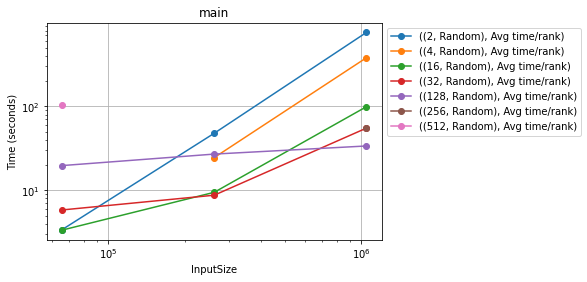

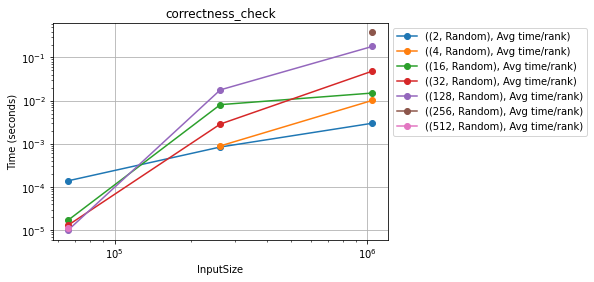

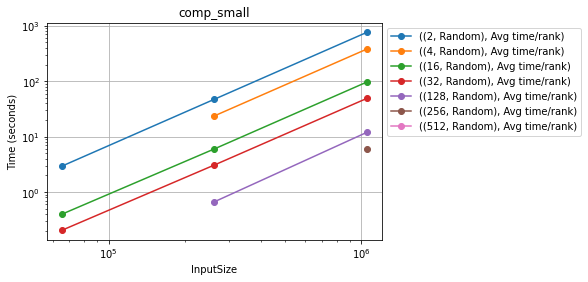

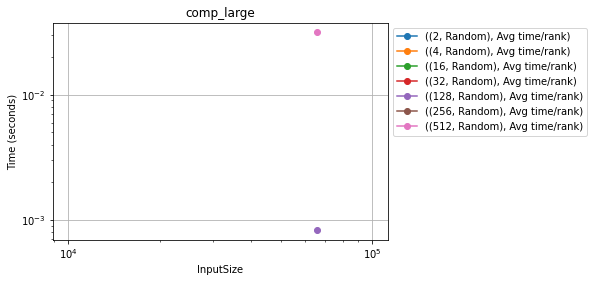

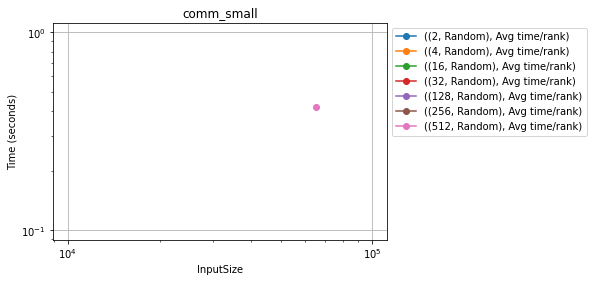

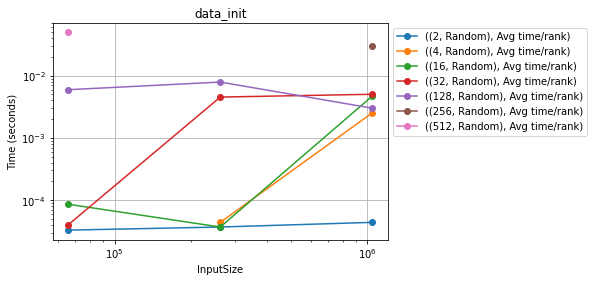

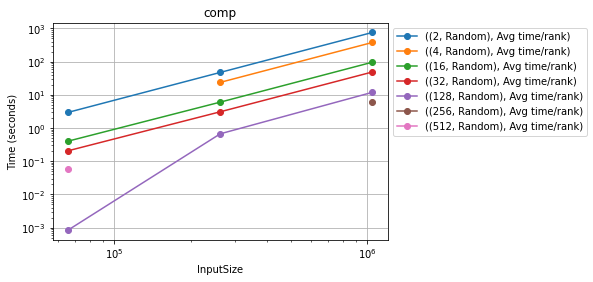

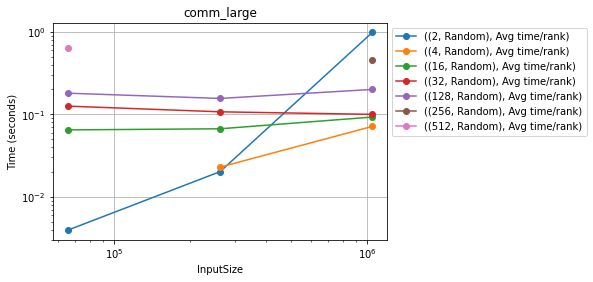

In [52]:
for name in function_names:
    for InputType in InputTypes:
        ax = plot_pandas(
            df=ctk.dataframe[[col for col in ctk.dataframe.columns if col[0][1] == InputType and col[1] == "Avg time/rank"]].loc[name],
            title=name,
            xlabel="InputSize",
            ylabel="Time (seconds)",
            loglog=True
        )
        ax.legend(loc='upper left', bbox_to_anchor=(1, 1))